# only run the next cell if it is the first time the code is running.

In [ ]:
import pandas as pd
import os 

for file in os.listdir('data'):
    if file.endswith('.csv'):
        # print(file)
        df = pd.read_csv('data/' + file)
        df.columns = df.iloc[0]
        df = df.drop(index=0)
        df.rename(columns={df.columns[-1]:'voltage'}, inplace=True)
        df['datetime'] = pd.to_datetime(df['type'], utc=True, format='%Y-%m-%d %H:%M:%S')
        df.set_index('datetime', inplace=True)
        df = df.drop(columns=['type'])
        df.index = pd.to_datetime(df.index)
        df.to_csv('data/' + file, index=True)
        # print(df.head())
        
df_main = pd.DataFrame()
for file in os.listdir('data'):
    if file.endswith('.csv'):
        df = pd.read_csv('data/' + file)
        df_main = pd.concat([df_main, df])
pd.to_datetime(df_main['datetime'])
df_main.set_index('datetime', inplace=True)
df_main.to_csv('data/bulding1_main_dt.csv', index=True)

building1_1min_2017-Q1.csv
0                             active   apparent    voltage
datetime                                                  
2017-01-01 00:00:00+00:00  376.18066  426.82666  244.09267
2017-01-01 00:01:00+00:00  376.26083  427.66266  244.00417
2017-01-01 00:02:00+00:00  370.25867  422.37283  244.17500
2017-01-01 00:03:00+00:00   370.7815  422.77866  244.42700
2017-01-01 00:04:00+00:00  369.19333  421.20416  244.56200
building1_1min_2013-Q2.csv
0                         active apparent  voltage
datetime                                          
2013-03-31 23:00:00+00:00    NaN      NaN      NaN
2013-03-31 23:01:00+00:00    NaN      NaN      NaN
2013-03-31 23:02:00+00:00    NaN      NaN      NaN
2013-03-31 23:03:00+00:00    NaN      NaN      NaN
2013-03-31 23:04:00+00:00    NaN      NaN      NaN
building1_1min_2014-Q4.csv


/home/hossein/anaconda3/envs/nilmtk-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0                             active   apparent    voltage
datetime                                                  
2014-09-30 23:00:00+00:00  188.63617  259.50684  244.78300
2014-09-30 23:01:00+00:00    188.517    258.781  243.73550
2014-09-30 23:02:00+00:00  185.78117  256.60016  242.60316
2014-09-30 23:03:00+00:00  187.59534  257.98666  241.82333
2014-09-30 23:04:00+00:00    195.778    264.211  241.76216
building1_1min_2015-Q4.csv
0                             active   apparent    voltage
datetime                                                  
2015-09-30 23:00:00+00:00    112.893    176.795  245.77950
2015-09-30 23:01:00+00:00  112.82933   176.6955  245.82450
2015-09-30 23:02:00+00:00  112.93967  176.57434  245.69284
2015-09-30 23:03:00+00:00  112.97667   176.5775  245.88283
2015-09-30 23:04:00+00:00  112.77367   176.4095  245.53017
building1_1min_2016-Q2.csv
0                             active   apparent    voltage
datetime                                                  
20

In [66]:
df_main = pd.read_csv('data/bulding1_main_dt.csv', index_col='datetime', parse_dates=True)

/tmp/ipykernel_1336/1479515601.py:3: FutureWarning: TimeGrouper.ax is deprecated and will be removed in a future version. Use Resampler.ax instead
  df_main_1h = df_main.resample('1H').mean()
/tmp/ipykernel_1336/1479515601.py:3: FutureWarning: TimeGrouper.indexer is deprecated and will be removed in a future version. Use Resampler.indexer instead.
  df_main_1h = df_main.resample('1H').mean()
/tmp/ipykernel_1336/1479515601.py:3: FutureWarning: TimeGrouper.obj is deprecated and will be removed in a future version. Use GroupBy.indexer instead.
  df_main_1h = df_main.resample('1H').mean()


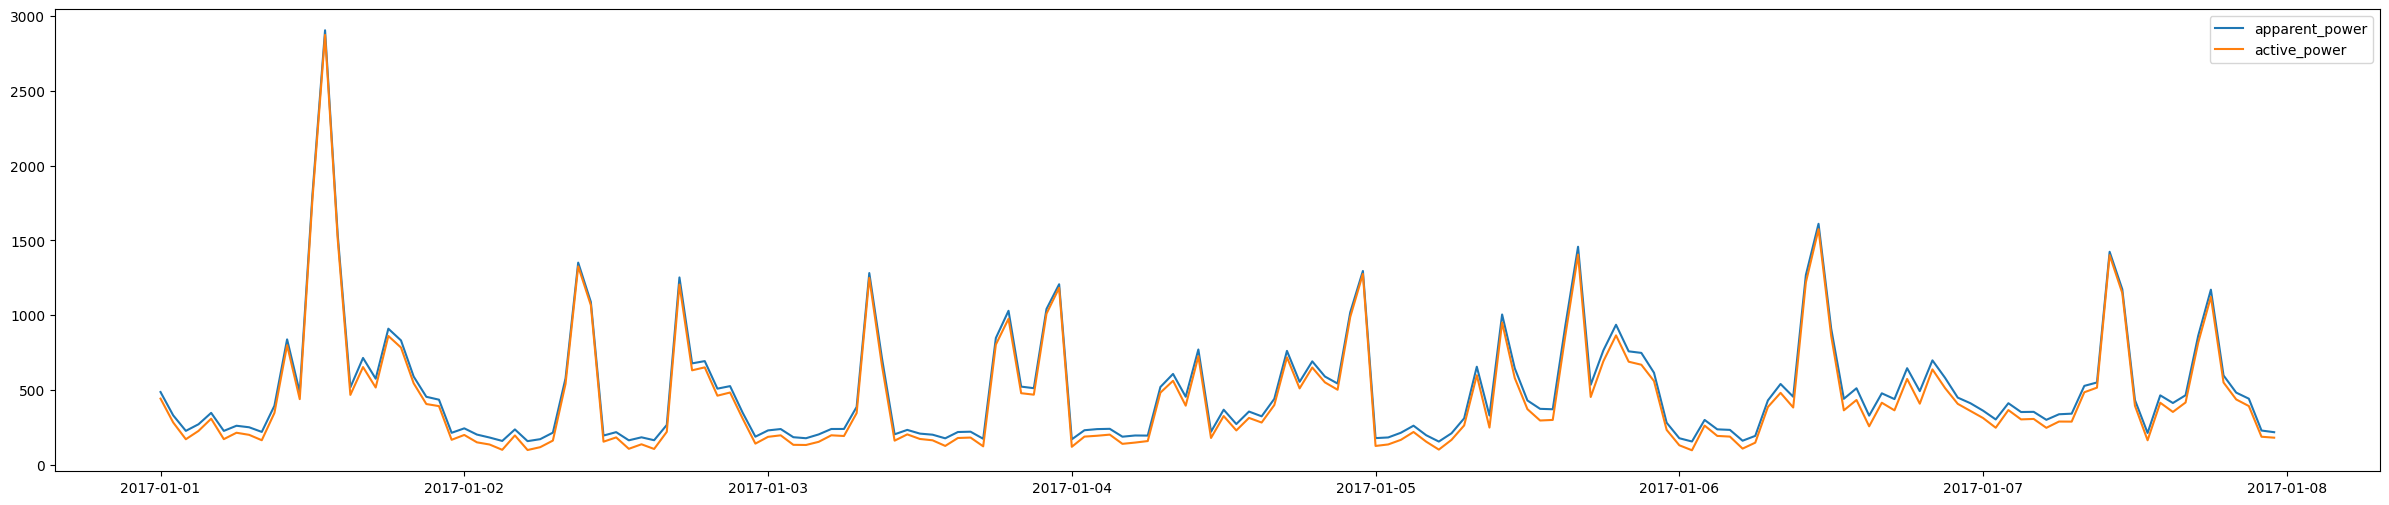

In [67]:
import matplotlib.pyplot as plt

df_main_1h = df_main.resample('1H').mean()

df_mian_selected = df_main_1h.loc['2017-01-01':'2017-01-07']
fig = plt.figure(figsize=(30, 6))
plt.plot(df_mian_selected.index, df_mian_selected['apparent_power'], label='apparent_power')
plt.plot(df_mian_selected.index, df_mian_selected['active_power'], label='active_power')
plt.legend()
plt.show()

In [45]:
df_pv = pd.read_csv('data/annual_load_pv.csv', index_col='Time', parse_dates=True)

In [ ]:
df_pv_1min = df_pv.resample('1T').mean()
df_pv_1hour = df_pv_1min.resample('1H').mean()
df_pv_1hour['generation'] = df_pv_1hour['Total PV Gen']
df_pv_1hour = df_pv_1hour.drop(columns=['Total PV Gen', 'Total Load'])
df_pv_1hour = df_pv_1hour.reset_index(inplace=False)
df_pv_1hour.drop(columns=['Time'], inplace=True)
df_pv_1hour.to_csv('data/pv_1hour.csv', index=False)

/tmp/ipykernel_1336/1337462745.py:1: FutureWarning: TimeGrouper.ax is deprecated and will be removed in a future version. Use Resampler.ax instead
  df_pv_1min = df_pv.resample('1T').mean()
/tmp/ipykernel_1336/1337462745.py:1: FutureWarning: TimeGrouper.indexer is deprecated and will be removed in a future version. Use Resampler.indexer instead.
  df_pv_1min = df_pv.resample('1T').mean()
/tmp/ipykernel_1336/1337462745.py:1: FutureWarning: TimeGrouper.obj is deprecated and will be removed in a future version. Use GroupBy.indexer instead.
  df_pv_1min = df_pv.resample('1T').mean()


In [ ]:
df_main_1min = df_main.resample('1T').mean()
df_main_1hour = df_main_1min.resample('1H').mean()

/tmp/ipykernel_1336/4173709662.py:1: FutureWarning: TimeGrouper.ax is deprecated and will be removed in a future version. Use Resampler.ax instead
  df_main_1min = df_main.resample('1T').mean()
/tmp/ipykernel_1336/4173709662.py:1: FutureWarning: TimeGrouper.indexer is deprecated and will be removed in a future version. Use Resampler.indexer instead.
  df_main_1min = df_main.resample('1T').mean()
/tmp/ipykernel_1336/4173709662.py:1: FutureWarning: TimeGrouper.obj is deprecated and will be removed in a future version. Use GroupBy.indexer instead.
  df_main_1min = df_main.resample('1T').mean()


In [68]:
from datetime import datetime

def reformat_index(index_value):
    # Split date and time
    date_part, time_part = index_value.split(':')
    # Convert to datetime and format with timezone
    dt = datetime.strptime(f"{date_part}{time_part}", "%Y%m%d%H%M")
    return dt.strftime("%Y-%m-%d %H:%M:%S") + "+00:00"

In [ ]:
pvgis = pd.read_csv('data/pvgis.csv', index_col='time', parse_dates=True)
pvgis.index = pvgis.index.map(reformat_index)
pvgis.index = pd.to_datetime(pvgis.index)
pvgis.index = pvgis.index - pd.Timedelta(minutes=10)

/tmp/ipykernel_1336/3715044620.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pvgis = pd.read_csv('data/pvgis_data.csv', index_col='time', parse_dates=True)


In [69]:
df_test = pd.concat([df_main_1hour, pvgis], axis=1, join='inner')

In [ ]:
df_test.to_csv('data/dataset.csv', index=True)

In [2]:

df_test = pd.read_csv('data/dataset.csv', index_col='time', parse_dates=True)

NameError: name 'pd' is not defined

In [32]:
import pandas as pd

df = pd.read_csv('data/elecPriceData2020-24.csv')
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['date'].dt.date.astype('str') + ' ' + df['time'].astype('str'))
df.set_index('time', inplace=True)
df.index = df.index.tz_localize('UTC')
df.drop(columns=['date'], inplace=True)
print(df.head())

                           Estonia
time                              
2020-01-01 00:00:00+00:00    30.83
2020-01-01 01:00:00+00:00    28.78
2020-01-01 02:00:00+00:00    28.45
2020-01-01 03:00:00+00:00    27.90
2020-01-01 04:00:00+00:00    27.52


In [33]:
df.index = df.index  + pd.DateOffset(years=-7)

In [34]:
df['price'] = df['Estonia']
df.drop(columns=['Estonia'], inplace=True)
df.head()

,price
time,
2013-01-01 00:00:00+00:00,30.83
2013-01-01 01:00:00+00:00,28.78
2013-01-01 02:00:00+00:00,28.45
2013-01-01 03:00:00+00:00,27.90
2013-01-01 04:00:00+00:00,27.52


In [35]:
df.to_csv('data/price.csv', index=True)

In [38]:
dataset = pd.read_csv('data/dataset.csv', index_col='time', parse_dates=True)
dataset.head()

,active_power,consumption,voltage,generation
time,,,,
2013-03-17 19:00:00+00:00,462.875353,546.284053,241.193259,0.0
2013-03-17 20:00:00+00:00,708.901392,763.008611,241.102103,0.0
2013-03-17 21:00:00+00:00,395.723977,444.559408,242.767234,0.0
2013-03-17 22:00:00+00:00,176.331850,223.229185,242.440272,0.0
2013-03-17 23:00:00+00:00,146.388878,199.155761,242.763692,0.0


In [40]:
# dataset = dataset.reset_index().drop_duplicates(subset='time').set_index('time')
df = df.reset_index().drop_duplicates(subset='time').set_index('time')
dataset = pd.concat([dataset, df], axis=1, join='inner')

In [41]:
dataset.head()

,active_power,consumption,voltage,generation,price
time,,,,,
2013-03-17 19:00:00+00:00,462.875353,546.284053,241.193259,0.0,42.27
2013-03-17 20:00:00+00:00,708.901392,763.008611,241.102103,0.0,31.09
2013-03-17 21:00:00+00:00,395.723977,444.559408,242.767234,0.0,30.06
2013-03-17 22:00:00+00:00,176.331850,223.229185,242.440272,0.0,30.01
2013-03-17 23:00:00+00:00,146.388878,199.155761,242.763692,0.0,7.10


In [42]:
dataset.tail()

,active_power,consumption,voltage,generation,price
time,,,,,
2017-04-26 13:00:00+00:00,321.812459,374.599071,247.550727,102.98,70.35
2017-04-26 14:00:00+00:00,335.933930,386.453154,246.108974,168.64,68.74
2017-04-26 15:00:00+00:00,337.608197,395.645617,244.674073,266.52,65.37
2017-04-26 16:00:00+00:00,291.351174,344.299944,244.667991,334.22,69.92
2017-04-26 17:00:00+00:00,1281.799476,1321.729618,244.254402,115.70,71.70


In [43]:
dataset.to_csv('data/dataset.csv', index=True)

In [45]:
import pandas as pd
import numpy as np


dataset = pd.read_csv('data/dataset.csv', index_col='time', parse_dates=True)
dataset.drop(['active_power', 'voltage'], inplace=True, axis=1)
dataset['consumption'].fillna(method='ffill', inplace=True)
dataset['generation'].fillna(method='ffill', inplace=True)
print(dataset.isnull().sum())


consumption    0
generation     0
price          0
dtype: int64
